In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
#This is to display whole of the dataframe
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
#Loading the Data
df = pd.read_csv('car-mpg.csv')
df = df.sample(frac = 1,random_state = 3)
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
358,31.6,4,120.0,74,2635,18.3,81,3,mazda 626
16,18.0,6,199.0,97,2774,15.5,70,1,amc hornet
292,18.5,8,360.0,150,3940,13.0,79,1,chrysler lebaron town @ country (sw)
81,28.0,4,97.0,92,2288,17.0,72,3,datsun 510 (sw)
112,19.0,4,122.0,85,2310,18.5,73,1,ford pinto


In [4]:
#Finding the unqiue values
df.hp.unique()

#here we see there is '?' here.

array(['74', '97', '150', '92', '85', '80', '110', '132', '145', '46',
       '170', '100', '152', '72', '70', '68', '75', '120', '95', '153',
       '86', '108', '90', '140', '82', '76', '64', '138', '88', '129',
       '230', '52', '?', '84', '210', '60', '122', '130', '96', '78',
       '65', '66', '81', '112', '67', '113', '58', '180', '48', '54',
       '165', '198', '69', '115', '105', '148', '215', '208', '98', '63',
       '139', '83', '190', '155', '71', '220', '79', '87', '135', '77',
       '125', '53', '116', '175', '89', '225', '160', '102', '137', '61',
       '62', '142', '158', '167', '149', '49', '107', '103', '193', '94',
       '93', '200', '91', '133'], dtype=object)

In [5]:
#To check the shape of Dataframe
df.shape

(398, 9)

In [6]:
#To check the data-type of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 358 to 362
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 31.1+ KB


# Cleaning Data¶
#hp

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 358 to 362
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 31.1+ KB


In [8]:
#Replacing ? with nan
df['hp'].replace('?',value=np.nan,inplace = True)

In [9]:
df['hp'] = df['hp'].astype(float)

In [10]:
#Imputing mean into horsepower column
df['hp'].replace(np.nan,df['hp'].mean(),inplace = True)

In [11]:
df['hp'] = df['hp'].astype('int64')

# Check for Missing Values

In [12]:
df.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [13]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Check for Outliers

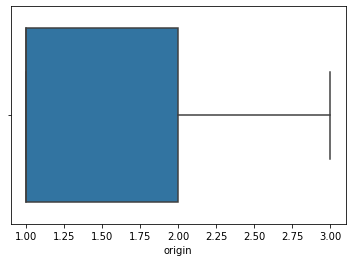

In [22]:
sns.boxplot(df.origin)   #hp,acc      #in disp ther should be outlier

# Building Multiple Linear Regression Model

In [23]:
df = df.drop('car_name',axis = 1)

In [24]:
y = df['mpg']
X = df.drop('mpg',axis = 1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [26]:
print(X_train.shape,X_test.shape)

(278, 7) (120, 7)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr = LinearRegression()
lr.fit(X_train,y_train)

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
print('r-square for train: ', r2_score(y_train,y_train_pred))
print('RMSE for train: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print('\n')
print('r-square for test: ', r2_score(y_test,y_test_pred))
print('RMSE for test: ', np.sqrt(mean_squared_error(y_test,y_test_pred)))

r-square for train:  0.8099110267405843
RMSE for train:  3.4021440286092273


r-square for test:  0.8435579841222761
RMSE for test:  3.090038660695418


# Regularization Techniques

# 1.Lasso

In [31]:
from sklearn.linear_model import Lasso,LassoCV

In [32]:
alphas = np.linspace(0.0001,1,100)
lasso_cv = LassoCV(alphas = alphas,cv = 3,random_state=3)
lasso_cv.fit(X,y)
lasso_cv

LassoCV(alphas=array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.617e-01, 1.718e-01,
       1.819e-01, 1.920e-01, 2.021e-01, 2.122e-01, 2.223e-01, 2.324e-01,
       2.425e-01, 2.526e-01, 2.627e-01, 2.728e-01, 2.829e-01, 2.930e-01,
       3.031e-01, 3.132e-01, 3.233e-0...
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=3, selection='cyclic', tol=0.0001,
        verbose=False)

In [33]:
lasso_cv.alpha_  #best alpha

0.1011

Best alpha is hitting the lowest. This indicate that this model doesn't require LASSO REGULARIZATION

# Ridge

In [34]:
from sklearn.linear_model import Ridge,RidgeCV


In [36]:
alphas = np.logspace(0,1,200)
ridge_cv = RidgeCV(alphas = alphas,scoring = 'r2', cv = 3)
ridge_cv.fit(X,y)
ridge_cv

RidgeCV(alphas=array([ 1.        ,  1.01163798,  1.0234114 ,  1.03532184,  1.0473709 ,
        1.05956018,  1.07189132,  1.08436597,  1.0969858 ,  1.1097525 ,
        1.12266777,  1.13573336,  1.148951  ,  1.16232247,  1.17584955,
        1.18953407,  1.20337784,  1.21738273,  1.2315506 ,  1.24588336,
        1.26038293,  1.27505124,  1.28989026,  1.30490198,  1.3200884 ,
        1.33545156,  1.35099352,  1.36671636,  1.38262217,  1.3987131 ,
        1.4149913 ,  1.431...
        7.57525026,  7.66341087,  7.75259749,  7.84282206,  7.93409667,
        8.02643352,  8.11984499,  8.21434358,  8.30994195,  8.40665289,
        8.50448934,  8.60346442,  8.70359136,  8.80488358,  8.90735464,
        9.01101825,  9.1158883 ,  9.22197882,  9.32930403,  9.43787828,
        9.54771611,  9.65883224,  9.77124154,  9.88495905, 10.        ]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [37]:
ridge_cv.alpha_

10.0

In [40]:
ridge = Ridge(alpha=ridge_cv.alpha_,random_state=3)

ridge.fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('r-square of Train: ',r2_score(y_train,y_train_pred))
print('r-square of Test: ',r2_score(y_test,y_test_pred))

r-square of Train:  0.8098198061567787
r-square of Test:  0.8428739018321874


In [41]:
ridge_cv.coef_

array([-0.37339191,  0.01756779, -0.01053964, -0.0067359 ,  0.10112247,
        0.75512054,  1.32478724])

# 3. Elastic Net

In [42]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [43]:
alphas = np.logspace(-4,0,100)

en_cv = ElasticNetCV(alphas = alphas,cv = 3,random_state=3)
en_cv.fit(X,y)

ElasticNetCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.054802...
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
             copy_X=True, cv=3, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=3,
             selection='cyclic', tol=0.0001, verbose=0)

In [47]:
en_cv.alpha_

0.06734150657750829